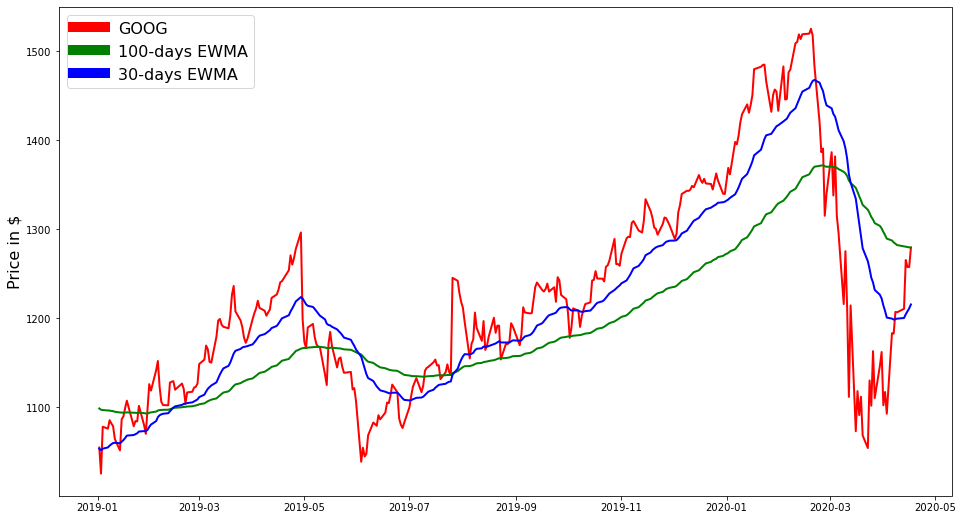

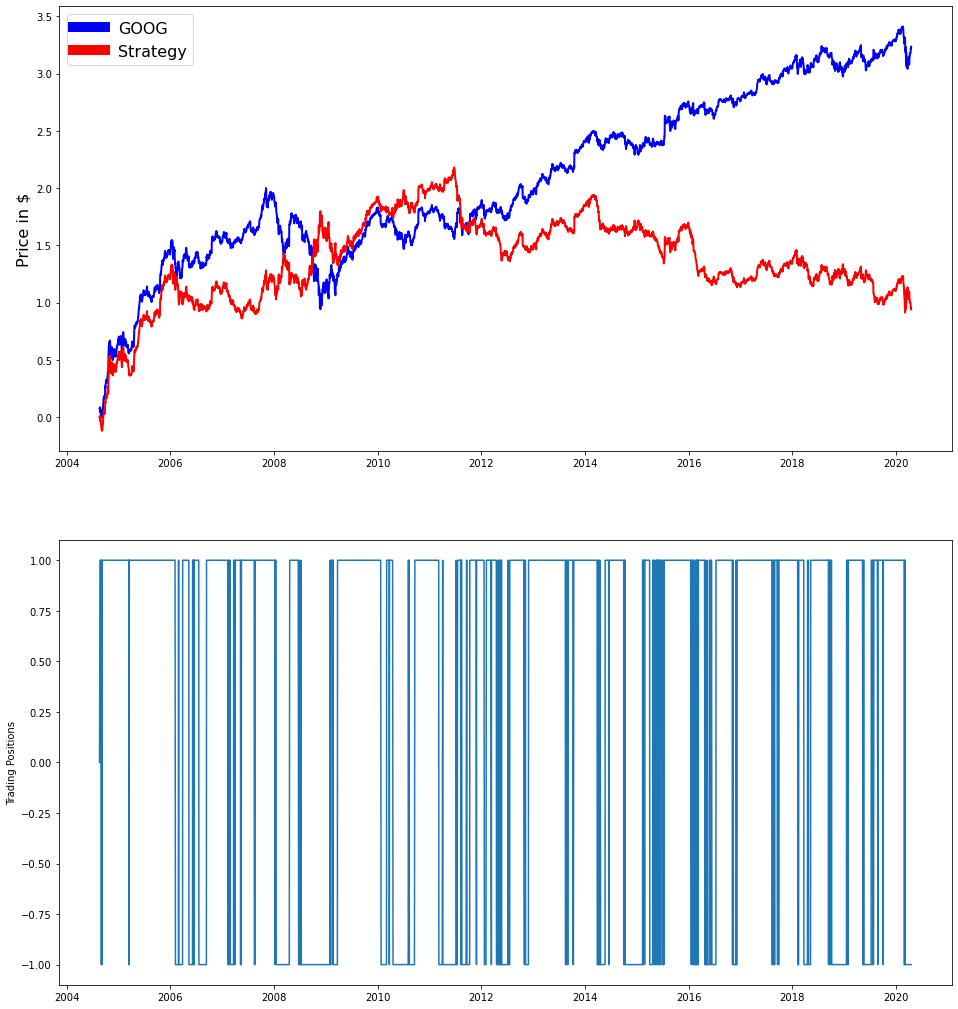

In [55]:
"""
Script for Moving Average Crossover Strategy
https://www.learndatasci.com/tutorials/python-finance-part-yahoo-finance-api-pandas-matplotlib/
https://www.learndatasci.com/tutorials/python-finance-part-2-intro-quantitative-trading-strategies/
https://www.learndatasci.com/tutorials/python-finance-part-3-moving-average-trading-strategy/
"""

# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf


## Load OHLC data from csv file and format the index
tseries = pd.read_csv('C:/Develop/data/SP500_2020/GOOGL.csv', parse_dates=True, date_parser=pd.to_datetime, index_col='index')
# Rename columns
tseries.columns = ['Open', 'High', 'Low', 'Close', 'Volume']

# Calculate the short and long-window simple moving averages
# ma_short = tseries['Close'].rolling(window=20).mean()
# ma_long = tseries['Close'].rolling(window=100).mean()
ma_short = tseries['Close'].ewm(span=30, adjust=False).mean()
ma_long = tseries['Close'].ewm(span=100, adjust=False).mean()

startd = '2019-01-01'
endd = '2020-04-17'

# Plot
fig, ax = plt.subplots(figsize = (16, 9))

ax.plot(tseries.loc[startd:endd, :].index, tseries.loc[startd:endd, 'Close'], label = 'GOOG', linewidth = 2, color = 'r')
ax.plot(ma_long.loc[startd:endd].index, ma_long.loc[startd:endd], label = '100-days EWMA', linewidth = 2, color = 'g')
ax.plot(ma_short.loc[startd:endd].index, ma_short.loc[startd:endd], label = '30-days EWMA', linewidth = 2, color = 'b')

ax.set_ylabel('Price in $', size = 16)

# legend.get_frame().set_facecolor('C0')
legendo = ax.legend(loc='best', prop=dict(size=16))

for line in legendo.get_lines():
    line.set_linewidth(10)

plt.show()


## Moving Average Crossover Strategy

# Difference between the prices and the EMA timeseries
posit = tseries['Close'] - ma_long
# Positions equal to the sign of the difference
posit = posit.apply(np.sign)
# Lag the positions
posit = posit.shift(1)

# Asset log returns
return_s = np.log(tseries['Close']).diff()

# Cumulative strategy returns
strategy_returns = posit * return_s
strategy_cum_returns = strategy_returns.cumsum()
asset_cum_returns = return_s.cumsum()

# Plot in two panels
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 18))

# Plot strategy cumulative returns
ax1.plot(tseries.index, asset_cum_returns, label = 'GOOG', linewidth = 2, color = 'b')
ax1.plot(tseries.index, strategy_cum_returns, label = 'Strategy', linewidth = 2, color = 'r')
ax1.set_ylabel('Price in $', size = 16)

legendo = ax1.legend(loc='best', prop=dict(size=16))
for line in legendo.get_lines():
    line.set_linewidth(10)

# Plot strategy positions
ax2.plot(tseries.index, posit, label='Trading Positions')
ax2.set_ylabel('Trading Positions')

plt.show()

